# Project: Investigate a Dataset - No-show appointment.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This project will be analyzing data on no-show medical appointments made in some hospitals on Brazil. It contains the data of 110,527 appointments. The last column of the dataset tells whether or not there was no show. There are other fields that give information about the patient, time of appointment and place of appointment. The expectation of this project is to analyze the data and find out whether or not the dataset can be used to predict if a patient will not show up for an appointment. 

>Questions posed are:
What are the main characteristics of the patients? Are people with same-day appointment more or less likely to show up for appointment? Are people prone to not showing up for appointment based on their neigborhood? Are females more prone to not showing up for appointment than males? What can be used to predict whether or not a patient will show up for appointment?



In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import datetime
from datetime import datetime, date, time
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.formula.api import ols
import seaborn

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# This step loads the csv data.
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [5]:
df.info()
# The datatype 0f both ScheduledDay and AppointmentDay need to be changed to datetetime.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

>The dataset is pretty clean and there are no missing data. Only minor cleaning needed to be done to the dataset. These are:
1. PatientId is not useful in the analysis. So, the field is dropped.
2. ScheduledDay and AppointmentDay contain both date and time. The time part of the fields is dropped, leaving only the date.
3. Someone has an Age of '-1'. This record should be deleted as it is unclear what the actual value should be.

In [6]:
#This step deletes the record for which Age is '-1' and confirms the record no longer exists.
df=df[df['Age']!=-1]
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [7]:
#This step drops both PatiendID and AppointmentID.
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
#These two steps creates a new column called "NoShowCoded" with 1 representing no-show and 0 representing the patients that showed up.
df['NoShowCoded'] = np.where(df['No-show']=='yes', '1', '0')
df['NoShowCoded'] = np.where(df['No-show']=='No', '0', '1')

#The step below changes the data type of the new colum to int.
df['NoShowCoded'] = df['NoShowCoded'].str.extract('(\d+)').astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [9]:
#The step below changes the data type of ScheduledDay from string to datetime.
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
#In order to remove the time part of the field, it is converted to date
df['ScheduledDay']=df['ScheduledDay'].dt.date
#It was observed that date has data type object. So, I decided to change the field back to datetime but without the time part.
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])


In [10]:
#This step converts the data type of AppointmentDay to datetime.
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [11]:
#Rename "No-show" to NoShow to allow some operations
df=df.rename(columns = {'No-show':'NoShow'})

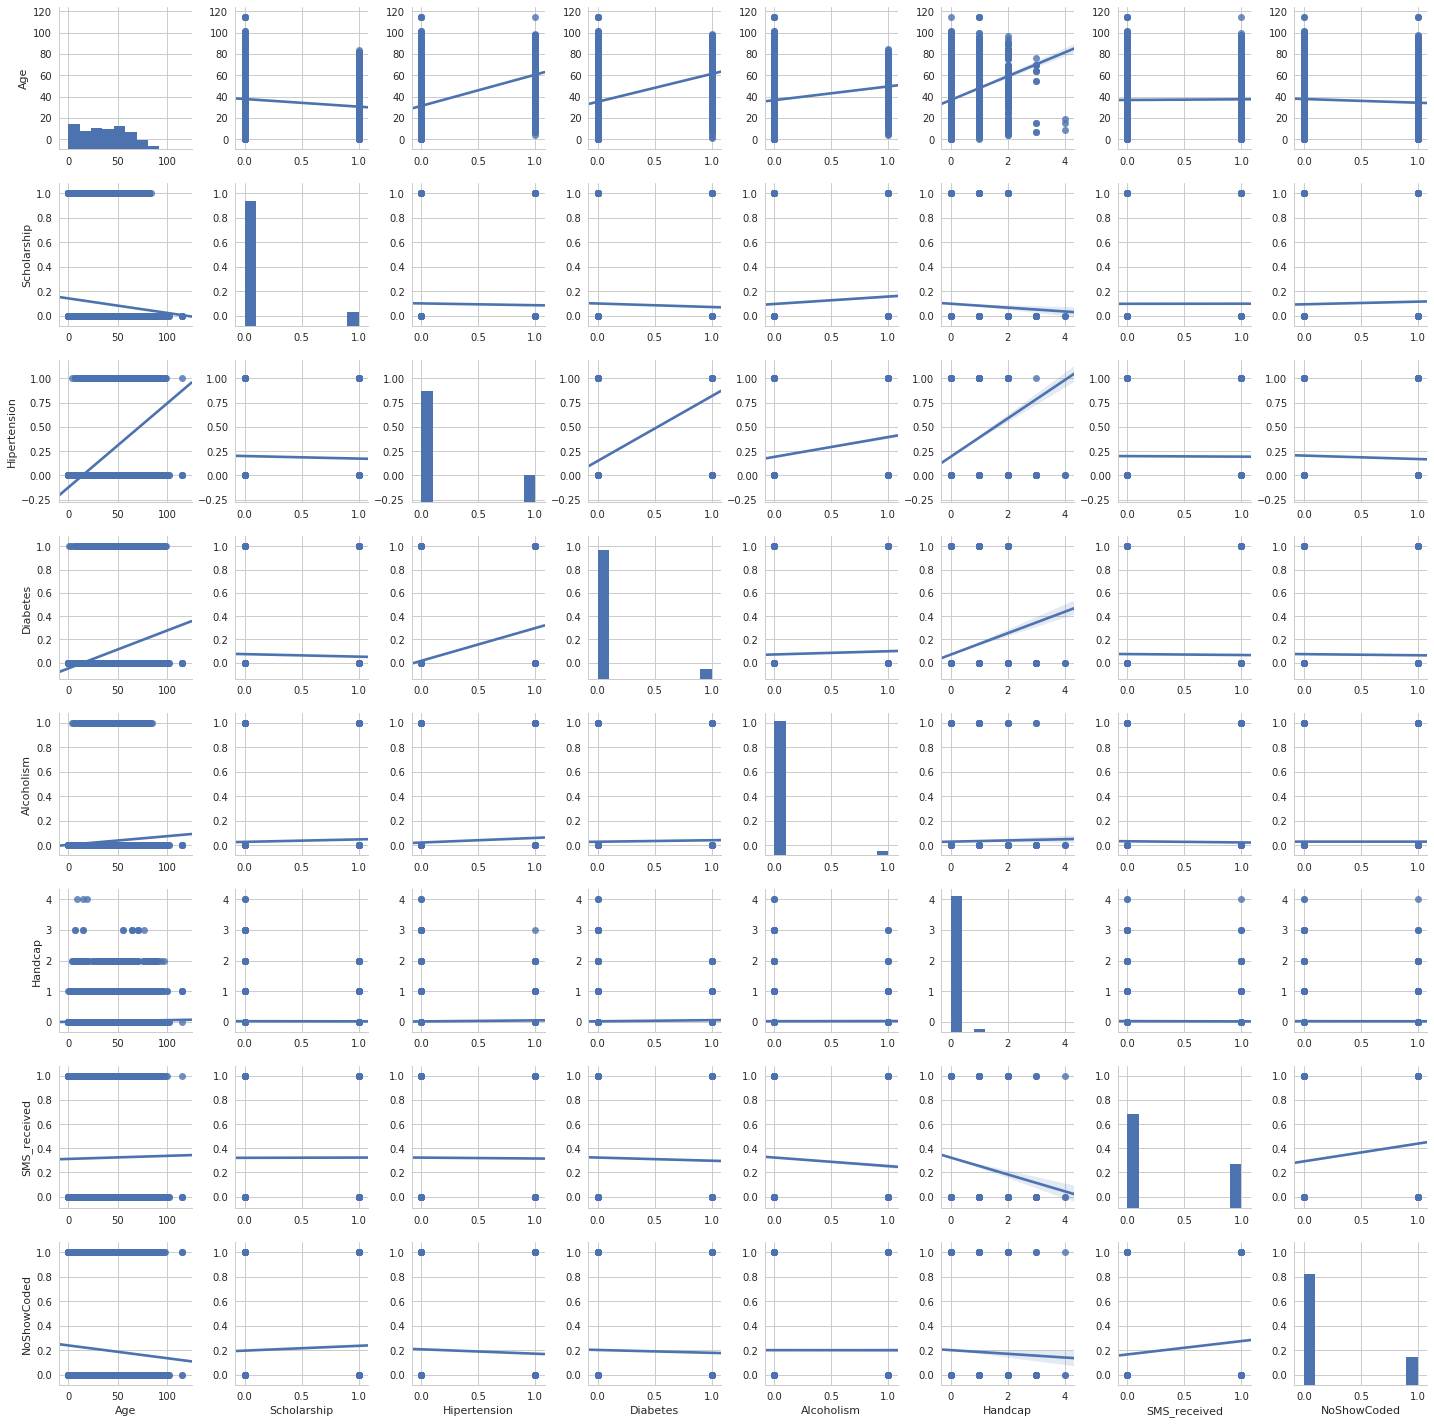

In [138]:
seaborn.pairplot(df,kind='reg')
# The visualizations below take a general look at all the columns in the data before any analysis is done.

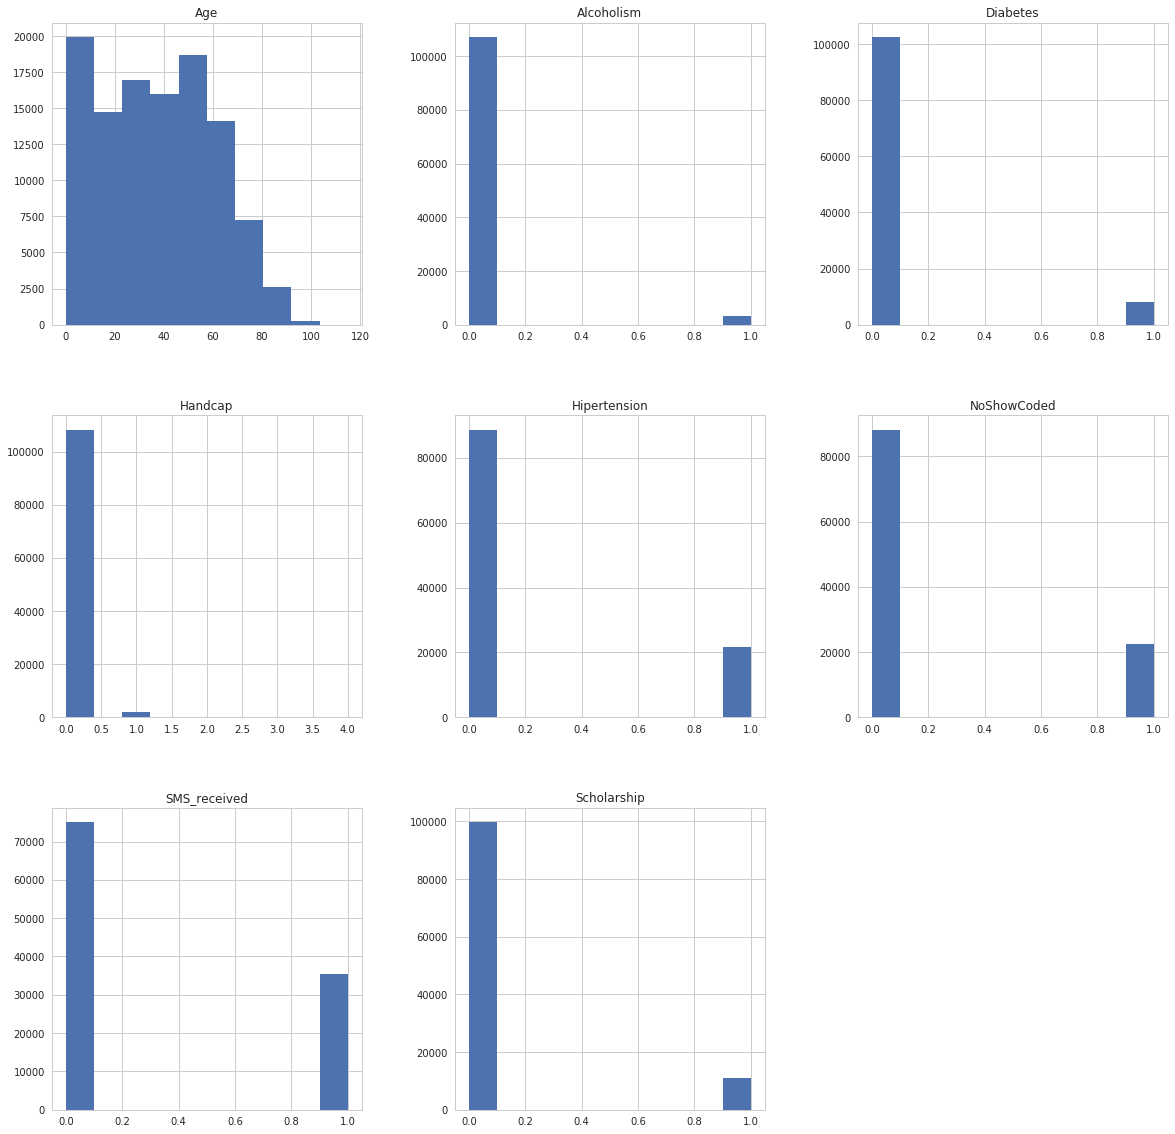

In [139]:
df.hist(figsize=(20,20));
# It should be noted that Age is positively skewed.

> The charts above show that Age is positively skewed.

<a id='eda'></a>
## Exploratory Data Analysis
### Research Questions
> 1. Are people with same-day appointment more or less likely to show up for appointment?
2. Are people prone to not showing up for appointment based on their neigborhood?
3. Are females more prone to not showing up for appointment than males? 

In [12]:
#Out of curiosity, I'd like to know if those that booked same-day appointment (scheduled day is the samme as appointment dat) were more or less prone to not showing up for the appointment than the other group.
SameDayAppointment = df[df['ScheduledDay']==df['AppointmentDay']]
DifferentDayAppointment= df[df['ScheduledDay']!=df['AppointmentDay']]


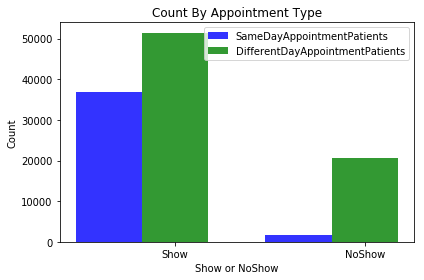

In [13]:
# data to plot
n_groups = 2

SameDayAppointmentPatients = (int(SameDayAppointment[SameDayAppointment['NoShow']=='No']['NoShow'].value_counts()), int(SameDayAppointment[SameDayAppointment['NoShow']=='Yes']['NoShow'].value_counts()))
DifferentDayAppointmentPatients =(int(DifferentDayAppointment[DifferentDayAppointment['NoShow']=='No']['NoShow'].value_counts()), int(DifferentDayAppointment[DifferentDayAppointment['NoShow']=='Yes']['NoShow'].value_counts()))
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, SameDayAppointmentPatients, bar_width,
                 alpha=opacity,
                 color='b',
                 label='SameDayAppointmentPatients')
 
rects2 = plt.bar(index + bar_width, DifferentDayAppointmentPatients, bar_width,
                 alpha=opacity,
                 color='g',
                 label='DifferentDayAppointmentPatients')
 
plt.xlabel('Show or NoShow')
plt.ylabel('Count')
plt.title('Count By Appointment Type')
plt.xticks(index + bar_width, ('Show', 'NoShow'))
plt.legend()
 
plt.tight_layout()
plt.show()

>The chart above shows that among the patients who made same-day appointment, a signigicantly smaller number did not show up for the appointment (1,792) compared to those who showed up (36,770). Before arriving at any conclusion, it will be nice to look at the proportions of same-day and different-day appointment who showed up and did not show up respectively. This is shown in the chart below.

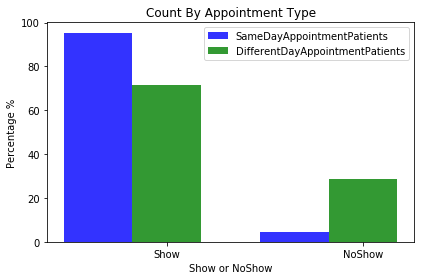

In [14]:
# data to plot
n_groups = 2


SameDayAppointmentPatients = (int(SameDayAppointment[SameDayAppointment['NoShow']=='No']['NoShow'].value_counts())/SameDayAppointment.NoShow.count()*100, int(SameDayAppointment[SameDayAppointment['NoShow']=='Yes']['NoShow'].value_counts())/SameDayAppointment.NoShow.count()*100)
DifferentDayAppointmentPatients =(int(DifferentDayAppointment[DifferentDayAppointment['NoShow']=='No']['NoShow'].value_counts())/DifferentDayAppointment.NoShow.count()*100, int(DifferentDayAppointment[DifferentDayAppointment['NoShow']=='Yes']['NoShow'].value_counts())/DifferentDayAppointment.NoShow.count()*100)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, SameDayAppointmentPatients, bar_width,
                 alpha=opacity,
                 color='b',
                 label='SameDayAppointmentPatients')
 
rects2 = plt.bar(index + bar_width, DifferentDayAppointmentPatients, bar_width,
                 alpha=opacity,
                 color='g',
                 label='DifferentDayAppointmentPatients')
 
plt.xlabel('Show or NoShow')
plt.ylabel('Percentage %')
plt.title('Count By Appointment Type')
plt.xticks(index + bar_width, ('Show', 'NoShow'))
plt.legend()
 
plt.tight_layout()
plt.show()

> From the chart above, 95.4% of the same-day appointment patients showed up (blue bar on the left) and 4.6% didn't show up (blue bar on the right). In the same way, 71.5%of the different-day appointment showed up (green bar on the left) and 28.5% didn't show up.
Since lower percentage of same-day appointment patients didn't show up (4.6%) compared to different-day appointment patients (28.5%), it can be concluded that people who book same-day appointment are less likely to NOT show up for their appointment.

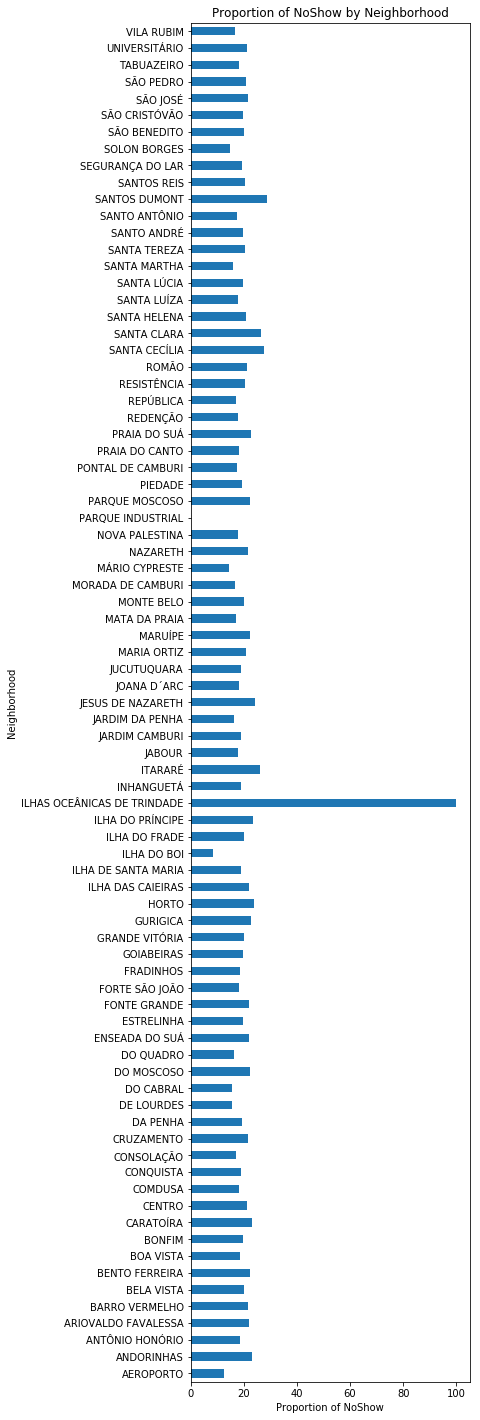

In [15]:
ax=round((df.groupby('Neighbourhood').NoShowCoded.sum()/df.groupby('Neighbourhood').NoShow.count()*100),2).plot(kind='barh', figsize=(5,25), title='Proportion of NoShow by Neighborhood')
ax.set_xlabel('Proportion of NoShow')
ax.set_ylabel('Neighborhood')
plt.show()

>The chart above shows the porportion of No-Show for all neighborhoods. The chart shows that 100% of the patients from Ilhas Oceanicas De Trinidade did not show up for appointment. This is wierd but the data doesn't show what caused this. On the other end of the spectrum is Parque Moscoso with 0% NoShow. All other neighborhoods have between 10% and 30% NoShow.

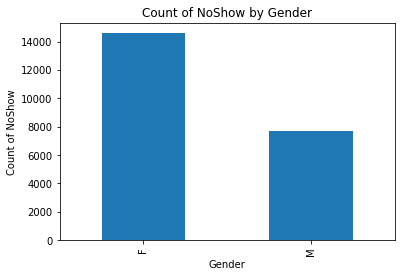

In [16]:
ax=df.groupby('Gender').NoShowCoded.sum().plot(kind='bar', title='Count of NoShow by Gender')
ax.set_ylabel('Count of NoShow')
plt.show()

>The chart above shows that females (count of 14,594) have a higher chance of not showing up than males (count of 7,725). However, this may be because there are almost twice as many females than males (seen from the previous cell).

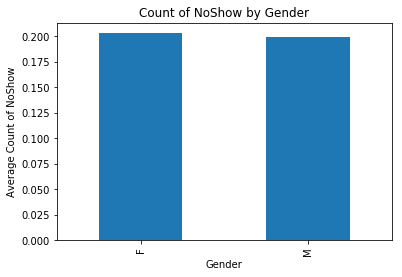

In [17]:
ax=df.groupby('Gender').NoShowCoded.mean().plot(kind='bar', title='Count of NoShow by Gender')
ax.set_ylabel('Average Count of NoShow')
plt.show()

> In order to eliminate the effect of having more females than males, I have plotted the bar chart for the average count of NoShow for male and female. It can be seen that there is no significant difference between the averages of females (0.203) and male (0.199). Thus, neither females nor males are more likely to not show up for appointment.

<a id='conclusions'></a>
## Conclusions

From the analyses above, it has been shown that people with same-day appointment are more likely to show up for appointment than not show up. Even though the data shows that there are more females with no-show than male, we cannot conclude that females are more likely to not show up for appointment than male becuase there are almost twice as many females in the sample than males. Eliminating the effect of the difference in the number of females and the males in the sample shows that gender doesn't influence whether or not a patient shows up for an appointment.

It was also observed that residents of certain neighborhood are more likely to not show up than residents of other neighborhoods. Ilhas Oceanicas De Trinidade residents are most likely to not show up while residents of Parque Moscoso are likely to  show up all the time.

There are a couple of limitations to this study. The analysis showed that Ilhas Oceanicas De Trinidade residents are never likely to show up. Probably, the hospital stopped functioning after appointments were made but there is no evidence to prove this was the case or any other factor that may be responsible.

In addition, there's no data on cancellations. We have no idea whether some of the patients that failed to show up actually called to cancel their appointment. This information would have affected the way the data is analyzed.

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0